# breast cancer

In [0]:
import numpy as np
from sklearn import datasets
import pandas as pd
import sqlite3

In [0]:
cancer = datasets.load_breast_cancer()

In [0]:
pd_cancer = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [0]:
pd_cancer_target = pd.DataFrame(cancer['target'], columns=['target'])

In [0]:
def columnReplace(columns):
  new_column = []
  for i in columns:
    v = i.replace(" ", "_")
    new_column.append(v)
  return new_column

In [0]:
co = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [0]:
pd_cancer.columns = columnReplace(co)

In [0]:
pdc = pd.concat([pd_cancer_target, pd_cancer], axis=1)

In [0]:
conn = sqlite3.connect('cancer.db')

In [0]:
pdc.to_sql('cancel_table', conn, if_exists='replace', index=False)

##DES

In [0]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
len(cancer.data) # 데이터 569개

569

In [0]:
print(cancer.DESCR)

In [0]:
len(cancer.feature_names) # 특성 30개

30

In [0]:
len(cancer.data[0])

30

In [0]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
cancer.target_names # 양성, 음성

array(['malignant', 'benign'], dtype='<U9')

In [0]:
len(cancer.data)

569

In [0]:
for i in range(len(cancer.feature_names)):
  print(cancer.feature_names[i])
  print('총합 :', cancer.data[:, i].sum())
  print('평균 :', cancer.data[:, i].mean())
  print('중간값 :', np.median(cancer.data[:, i]))
  print('분산 :', cancer.data[:, i].var())
  print('표준편차 :', cancer.data[:, i].std())
  print('최대값 :', cancer.data[:, i].max())
  print('최소값 :', cancer.data[:, i].min())
  print('\n')


mean radius
총합 : 8038.429
평균 : 14.127291739894552
중간값 : 13.37
분산 : 12.397094259351807
표준편차 : 3.520950760711062
최대값 : 28.11
최소값 : 6.981


mean texture
총합 : 10975.81
평균 : 19.289648506151142
중간값 : 18.84
분산 : 18.46639741599513
표준편차 : 4.297254637090421
최대값 : 39.28
최소값 : 9.71


mean perimeter
총합 : 52330.380000000005
평균 : 91.96903339191564
중간값 : 86.24
분산 : 589.4027985384281
표준편차 : 24.27761929305318
최대값 : 188.5
최소값 : 43.79


mean area
총합 : 372631.9
평균 : 654.8891036906855
중간값 : 551.1
분산 : 123625.90307986448
표준편차 : 351.60475406323
최대값 : 2501.0
최소값 : 143.5


mean smoothness
총합 : 54.82900000000001
평균 : 0.0963602811950791
중간값 : 0.09587
분산 : 0.00019745207338314375
표준편차 : 0.014051764066591203
최대값 : 0.1634
최소값 : 0.05263


mean compactness
총합 : 59.37002
평균 : 0.10434098418277679
중간값 : 0.09263
분산 : 0.002784285489365303
표준편차 : 0.05276632912535515
최대값 : 0.3454
최소값 : 0.01938


mean concavity
총합 : 50.5268107
평균 : 0.0887993158172232
중간값 : 0.06154
분산 : 0.006344078747698308
표준편차 : 0.07964972534603185
최대값 : 0.42

In [0]:
for i in range(len(cancer.feature_names)):
  x = cancer.data[:, i]
  x_mean = cancer.data[:, i].mean()
  x_median = np.median(cancer.data[:, i])
  x_std = cancer.data[:, i].std()


  # print(np.min(x))
  # print(np.max(x))

  # print(x_mean)
  # print(x_std)
  # print(x_var)

  # print(len(x))

  mask_1 = ((x >= x_mean - 2) & (x <= x_mean + 2))
  mask_2 = ((x >= x_median - 2) & (x <= x_median + 2))
  mask_3 = ((x >= x_std - 2) & (x <= x_std + 2))

  selected_1 = x[mask_1]
  selected_2 = x[mask_2]
  selected_3 = x[mask_3]

  print('범위 안에 들어가는 값 개수')
  print(cancer.feature_names[i])
  print('평균 :', len(selected_1))
  print('중간값 :',len(selected_2))
  print('표준편차 :',len(selected_3))
  print('\n')



범위 안에 들어가는 값 개수
mean radius
평균 : 253
중간값 : 298
표준편차 : 0


범위 안에 들어가는 값 개수
mean texture
평균 : 203
중간값 : 216
표준편차 : 0


범위 안에 들어가는 값 개수
mean perimeter
평균 : 23
중간값 : 49
표준편차 : 0


범위 안에 들어가는 값 개수
mean area
평균 : 2
중간값 : 3
표준편차 : 0


범위 안에 들어가는 값 개수
mean smoothness
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
mean compactness
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
mean concavity
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
mean concave points
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
mean symmetry
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
mean fractal dimension
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
radius error
평균 : 567
중간값 : 567
표준편차 : 567


범위 안에 들어가는 값 개수
texture error
평균 : 565
중간값 : 564
표준편차 : 554


범위 안에 들어가는 값 개수
perimeter error
평균 : 502
중간값 : 482
표준편차 : 466


범위 안에 들어가는 값 개수
area error
평균 : 16
중간값 : 64
표준편차 : 18


범위 안에 들어가는 값 개수
smoothness error
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에 들어가는 값 개수
compactness error
평균 : 569
중간값 : 569
표준편차 : 569


범위 안에

# breast cancer plot

In [0]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


cancer = datasets.load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
cancer_malignant = cancer.data[cancer.target == 0]
cancer_benign = cancer.data[cancer.target == 1]

In [0]:
cancer_malignant

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01]])

In [0]:
cancer_benign

array([[1.354e+01, 1.436e+01, 8.746e+01, ..., 1.288e-01, 2.977e-01,
        7.259e-02],
       [1.308e+01, 1.571e+01, 8.563e+01, ..., 7.283e-02, 3.184e-01,
        8.183e-02],
       [9.504e+00, 1.244e+01, 6.034e+01, ..., 6.227e-02, 2.450e-01,
        7.773e-02],
       ...,
       [1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
        8.321e-02],
       [1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
        5.905e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [0]:
len(cancer_benign)

357

In [0]:
len(cancer_malignant)

212

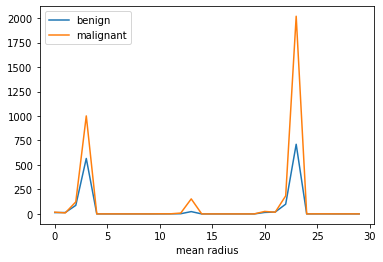

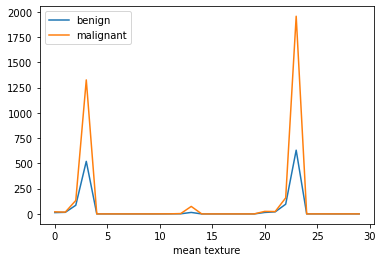

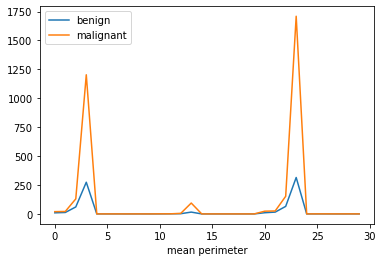

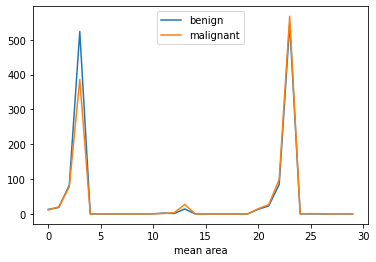

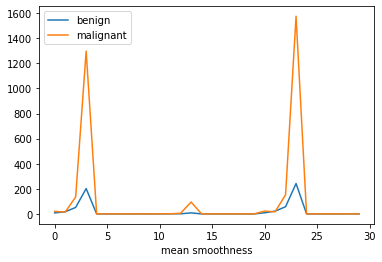

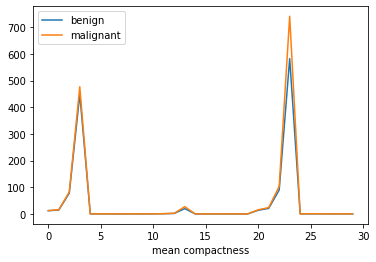

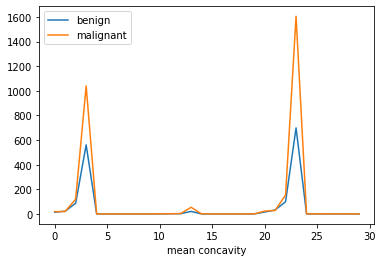

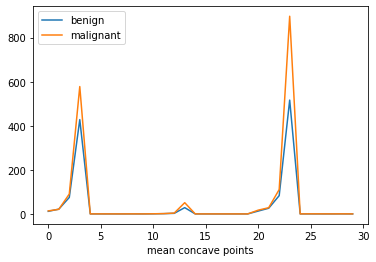

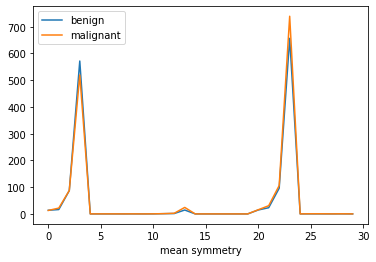

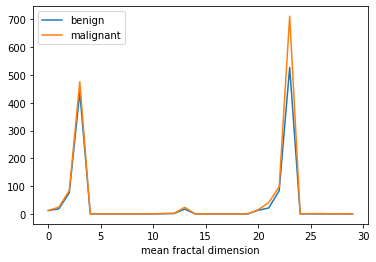

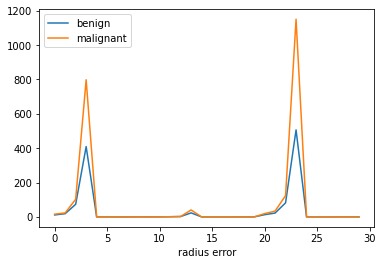

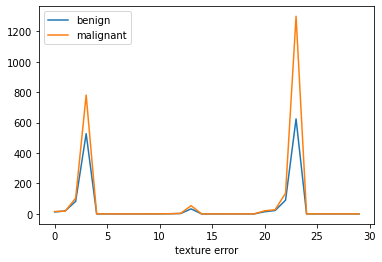

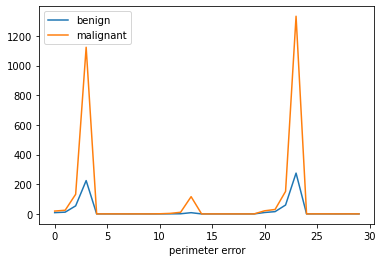

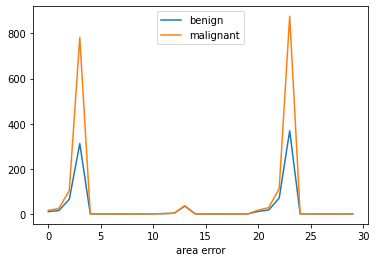

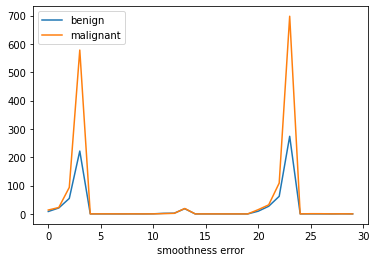

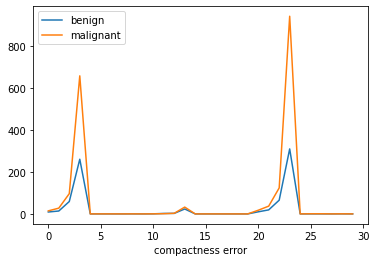

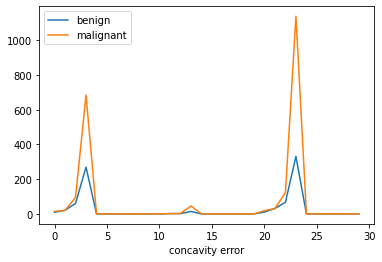

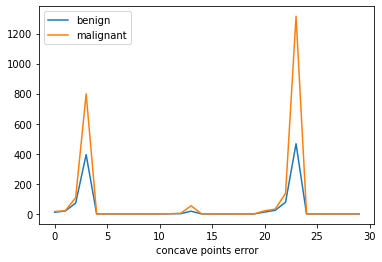

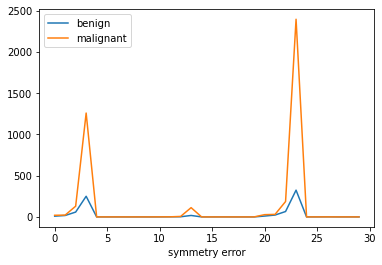

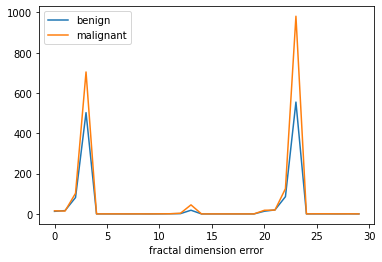

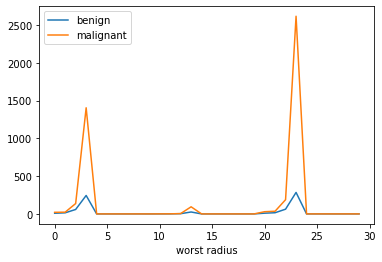

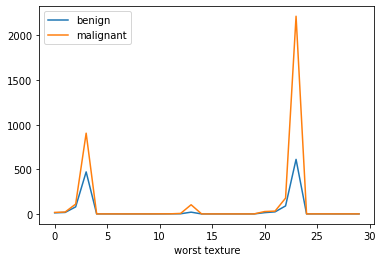

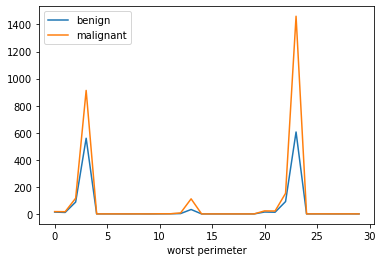

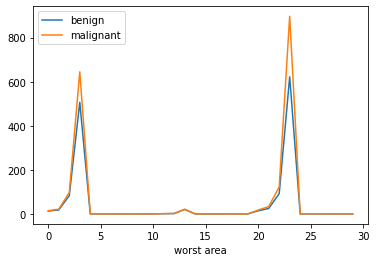

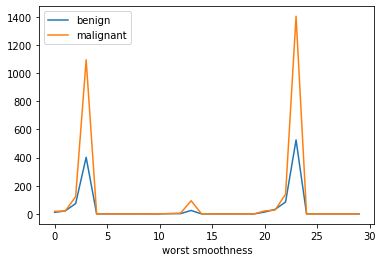

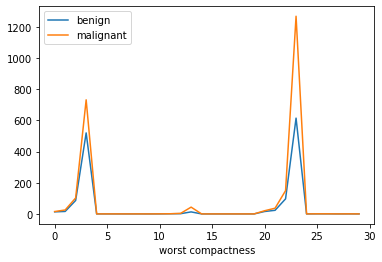

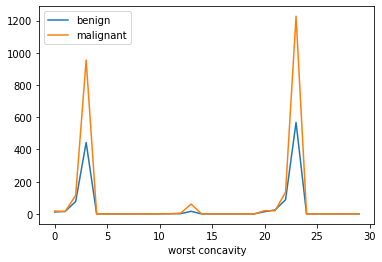

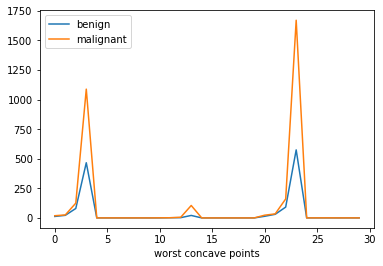

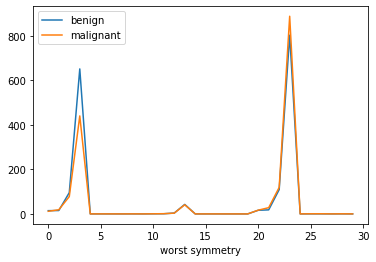

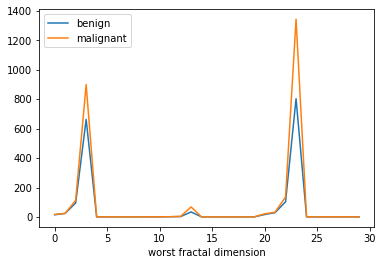

In [0]:
for i in range(len(cancer.feature_names)):
  plt.plot(cancer_benign[i], label='benign')
  plt.plot(cancer_malignant[i], label = 'malignant')
  plt.xlabel(cancer.feature_names[i])
  plt.legend()
  plt.show()

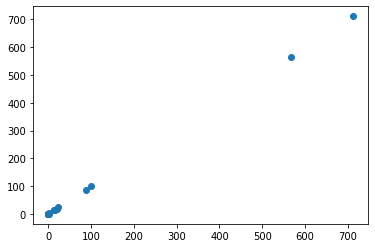

In [0]:
plt.scatter(cancer_benign[0], cancer_benign[0])

#Grid

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [0]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target)


In [0]:
lr = LogisticRegression()

In [0]:
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000], 'max_iter':[500, 5000]}

In [0]:
gscv = GridSearchCV(lr, param_grid=grid_values, return_train_score=True)

In [11]:
gscv.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [500, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [12]:
gscv.best_params_, gscv.best_index_, gscv.best_score_, gscv.best_estimator_

({'C': 1000, 'max_iter': 5000},
 13,
 0.9647332421340629,
 LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=5000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

In [0]:
model=gscv.best_estimator_